In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from codes import mvtecad

normal = mvtecad.get_x(obj = 'bottle', mode='train')

정상:  209  장


In [3]:
print(normal.shape)

(209, 256, 256, 3)


In [14]:
from contextlib import contextmanager

@contextmanager
def task(_):
    yield

def generate_coords(H, W, K):
    h = np.random.randint(0, H - K + 1)
    w = np.random.randint(0, W - K + 1)
    return h, w


def generate_coords_position(H, W, K):
    with task('P1'):
        p1 = generate_coords(H, W, K)
        h1, w1 = p1

    pos = np.random.randint(8)

    with task('P2'):
        J = K // 4

        K3_4 = 3 * K // 4
        h_dir, w_dir = pos_to_diff[pos]
        h_del, w_del = np.random.randint(J, size=2)

        h_diff = h_dir * (h_del + K3_4)
        w_diff = w_dir * (w_del + K3_4)

        h2 = h1 + h_diff
        w2 = w1 + w_diff

        h2 = np.clip(h2, 0, H - K)
        w2 = np.clip(w2, 0, W - K)

        p2 = (h2, w2)

    return p1, p2, pos


pos_to_diff = {
    0: (-1, -1),
    1: (-1, 0),
    2: (-1, 1),
    3: (0, -1),
    4: (0, 1),
    5: (1, -1),
    6: (1, 0),
    7: (1, 1)
}

In [15]:
print(normal[0].shape)

(256, 256, 3)


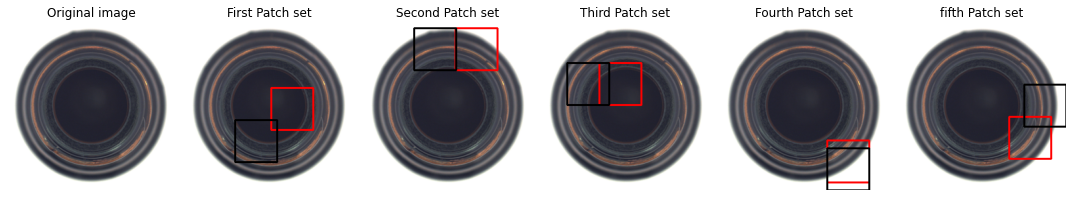

In [22]:
fig, axes = plt.subplots(ncols=6)
fig.set_size_inches(15, 8)

axes[0].imshow(normal[0])
axes[0].set_axis_off()
axes[0].set_title("Original image")

p1, p2, pos = generate_coords_position(256, 256, 64)

p11, p12 = p1
p21, p22 = p2


# Red : main / black : neighbor
# https://copycoding.tistory.com/146
# image, 시작점 좌표(x, y), 종료점 좌표(x, y), 색상, 두께
box_image = cv2.rectangle(normal[0].copy(), (p11, p12), (p11+64, p12+64), (255, 0, 0), 2)
box_image = cv2.rectangle(box_image, (p21, p22), (p21+64, p22+64), (0, 0, 0), 2)

axes[1].imshow(box_image)
axes[1].set_axis_off()
axes[1].set_title("First Patch set")


p1, p2, pos = generate_coords_position(256, 256, 64)

p11, p12 = p1
p21, p22 = p2

# Red : main / black : neighbor
box_image_2 = cv2.rectangle(normal[0].copy(), (p11, p12), (p11+64, p12+64), (255, 0, 0), 2)
box_image_2 = cv2.rectangle(box_image_2, (p21, p22), (p21+64, p22+64), (0, 0, 0), 2)


axes[2].imshow(box_image_2)
axes[2].set_axis_off()
axes[2].set_title("Second Patch set")



p1, p2, pos = generate_coords_position(256, 256, 64)

p11, p12 = p1
p21, p22 = p2

# Red : main / black : neighbor
box_image_3 = cv2.rectangle(normal[0].copy(), (p11, p12), (p11+64, p12+64), (255, 0, 0), 2)
box_image_3 = cv2.rectangle(box_image_3, (p21, p22), (p21+64, p22+64), (0, 0, 0), 2)

axes[3].imshow(box_image_3)
axes[3].set_axis_off()
axes[3].set_title("Third Patch set")


p1, p2, pos = generate_coords_position(256, 256, 64)

p11, p12 = p1
p21, p22 = p2

# Red : main / black : neighbor
box_image_4 = cv2.rectangle(normal[0].copy(), (p11, p12), (p11+64, p12+64), (255, 0, 0), 2)
box_image_4 = cv2.rectangle(box_image_4, (p21, p22), (p21+64, p22+64), (0, 0, 0), 2)

axes[4].imshow(box_image_4)
axes[4].set_axis_off()
axes[4].set_title("Fourth Patch set")


p1, p2, pos = generate_coords_position(256, 256, 64)

p11, p12 = p1
p21, p22 = p2

# Red : main / black : neighbor
box_image_5 = cv2.rectangle(normal[0].copy(), (p11, p12), (p11+64, p12+64), (255, 0, 0), 2)
box_image_5 = cv2.rectangle(box_image_5, (p21, p22), (p21+64, p22+64), (0, 0, 0), 2)

axes[5].imshow(box_image_5)
axes[5].set_axis_off()
axes[5].set_title("fifth Patch set")



plt.tight_layout()
plt.show()